In [10]:
import itertools
import matplotlib.pyplot as plt

In [20]:
p_p = [0.13, 0.34, 0.86, 0.67, 0.74]
p_b = [0.99, 0.97, 0.88, 0.78, 0.96]
n = 5
p = []
for istr in range(n):
    p.append(round(p_p[istr] * p_b[istr], 5))
print(p)

[0.1287, 0.3298, 0.7568, 0.5226, 0.7104]


In [21]:
def P_n(p, n):
    P = 0
    combo = list(itertools.combinations(p, n))
    for case in combo:
        tmp_p = []
        for el in p:
            tmp_p.append(el)
        tmp = 1
        tmp_case = []
        for elem in case:
            tmp *= elem
            tmp_case.append(elem)
            print('+:', elem, end = ' | ')
        for ver in p:
            if ver in tmp_case:
                tmp_p.pop(tmp_p.index(ver))
                tmp_case.pop(tmp_case.index(ver))
        for ver in tmp_p:
            tmp *= 1 - ver
            print('-:', round(1 - ver, 5), end = ' | ')
        print('P =', round(tmp, 5))
        P += tmp
        tmp_p = p
    return round(P, 5)

In [22]:
n = [0, 1, 2, 3, 4, 5]
P_sum, P = [], []
for case in n:
    P.append(P_n(p, case))
    if case != 0:
        P_sum.append(P[-1]+ P_sum[-1])
    else:
        P_sum.append(P[-1])
    
print(P)
print(P_sum)

-: 0.8713 | -: 0.6702 | -: 0.2432 | -: 0.4774 | -: 0.2896 | P = 0.01963
+: 0.1287 | -: 0.6702 | -: 0.2432 | -: 0.4774 | -: 0.2896 | P = 0.0029
+: 0.3298 | -: 0.8713 | -: 0.2432 | -: 0.4774 | -: 0.2896 | P = 0.00966
+: 0.7568 | -: 0.8713 | -: 0.6702 | -: 0.4774 | -: 0.2896 | P = 0.0611
+: 0.5226 | -: 0.8713 | -: 0.6702 | -: 0.2432 | -: 0.2896 | P = 0.02149
+: 0.7104 | -: 0.8713 | -: 0.6702 | -: 0.2432 | -: 0.4774 | P = 0.04816
+: 0.1287 | +: 0.3298 | -: 0.2432 | -: 0.4774 | -: 0.2896 | P = 0.00143
+: 0.1287 | +: 0.7568 | -: 0.6702 | -: 0.4774 | -: 0.2896 | P = 0.00902
+: 0.1287 | +: 0.5226 | -: 0.6702 | -: 0.2432 | -: 0.2896 | P = 0.00317
+: 0.1287 | +: 0.7104 | -: 0.6702 | -: 0.2432 | -: 0.4774 | P = 0.00711
+: 0.3298 | +: 0.7568 | -: 0.8713 | -: 0.4774 | -: 0.2896 | P = 0.03007
+: 0.3298 | +: 0.5226 | -: 0.8713 | -: 0.2432 | -: 0.2896 | P = 0.01058
+: 0.3298 | +: 0.7104 | -: 0.8713 | -: 0.2432 | -: 0.4774 | P = 0.0237
+: 0.7568 | +: 0.5226 | -: 0.8713 | -: 0.6702 | -: 0.2896 | P = 0.0

In [25]:
m_sr = 0
for value in P_sum:
    m_sr += (1 - value)
print('В среднем будет перехвачено', round(m_sr, 3), 'истребителями')

В среднем будет перехвачено 2.448 истребителями


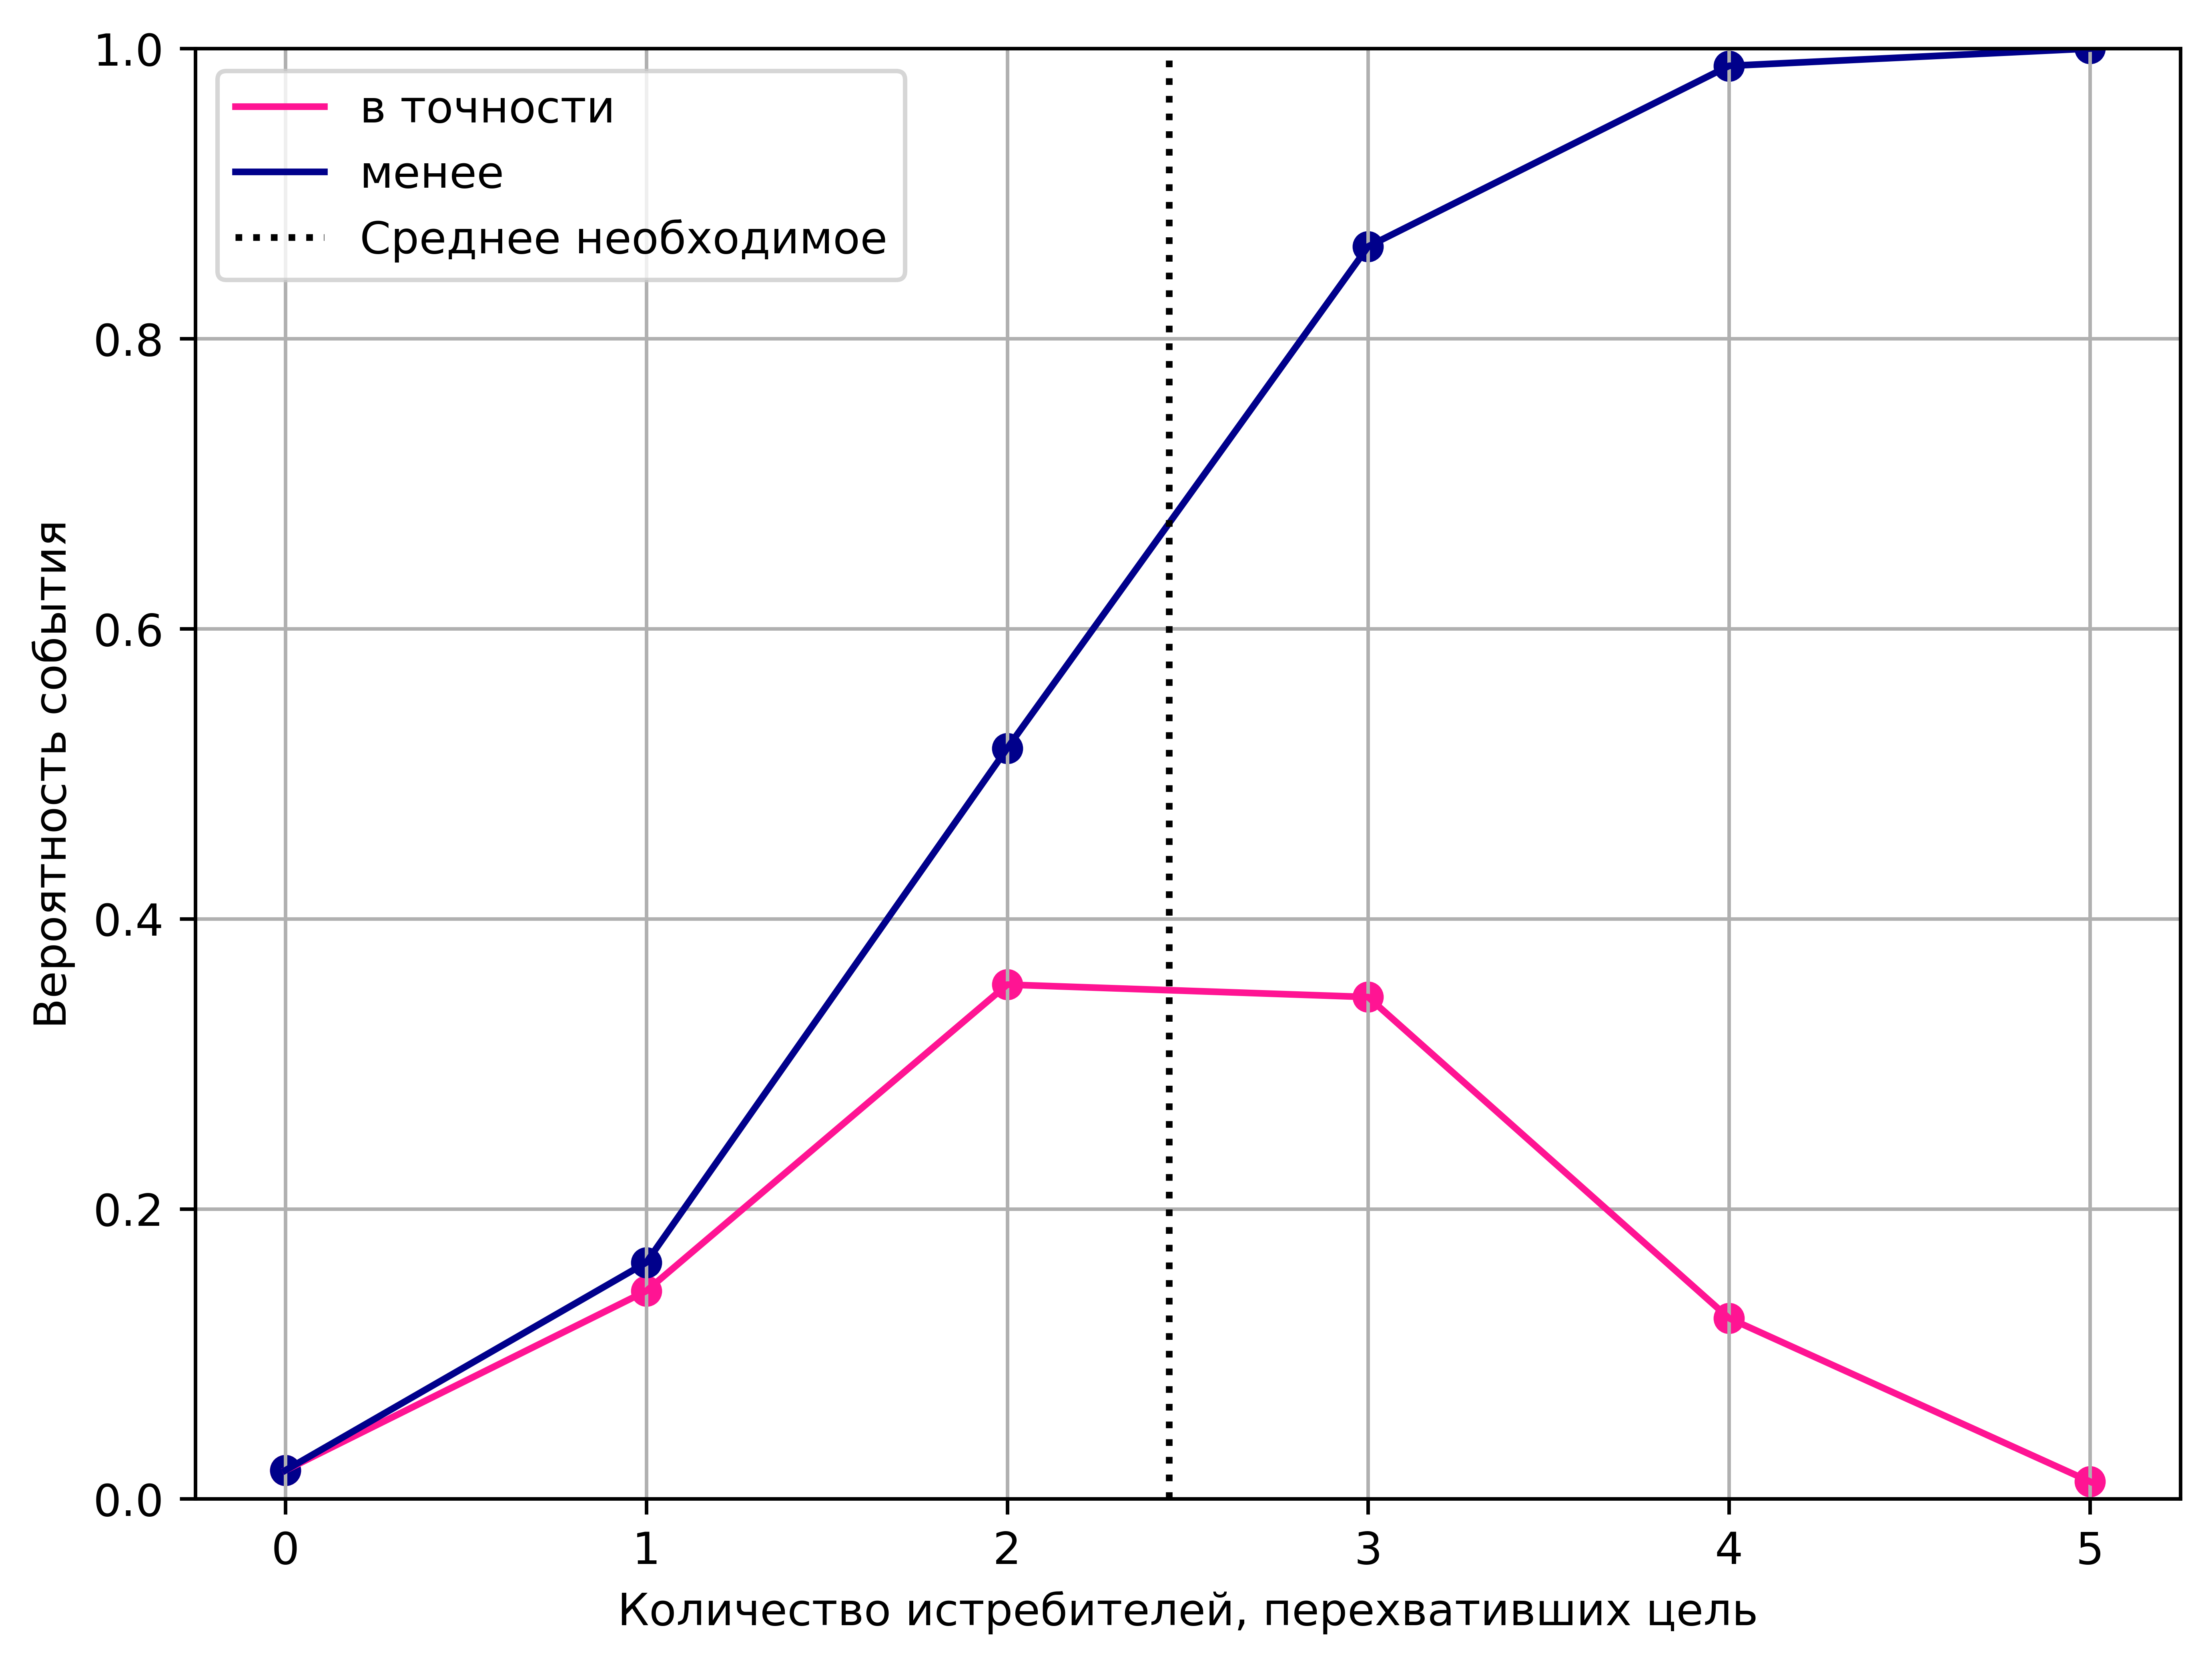

In [24]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=800)
plt.plot(P, label = 'в точности', color = 'deeppink')
plt.scatter(n, P, color = 'deeppink')
plt.plot(P_sum, label = 'менее', color = 'darkblue')
plt.scatter(n, P_sum, color = 'darkblue')
plt.ylim(0, 1)
plt.grid()
plt.vlines(m_sr, 0, 1, colors='black', linestyles=':', label='Среднее ожидаемое')
plt.xlabel('Количество истребителей, перехвативших цель')
plt.ylabel('Вероятность события')
plt.legend()
plt.show()